In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle
import matplotlib.pyplot as plt

In [6]:
training_data_SCT = pd.read_csv("Data/Scotland/scottish_data_training.csv")
training_labels_SCT = pd.read_csv("Data/Scotland/scottish_labels_training.csv")

In [7]:
training_data_US = pd.read_csv("Data/US/US_data_training.csv")
training_labels_US = pd.read_csv("Data/US/US_labels_training.csv")

In [9]:
model_4_hours_loaded_SCT,\
model_8_hours_loaded_SCT,\
model_12_hours_loaded_SCT,\
model_long_hours_loaded_SCT = None, None, None, None
with open("Models/TrainingRandomForestScotlandModel.pkl", 'rb') as save_file:
    model_bytes = save_file.read()
    print(len(model_bytes))
    model_4_hours_loaded_SCT,\
    model_8_hours_loaded_SCT,\
    model_12_hours_loaded_SCT,\
    model_long_hours_loaded_SCT = pickle.loads(model_bytes)

172234923


In [10]:
loaded_model_US = None
with open("Models/TrainingRandomForestUSModel.pkl", 'rb') as save_file:
    model_bytes = save_file.read()
    print(len(model_bytes))
    loaded_model_US = pickle.loads(model_bytes)

21875656


Text(0.5, 1.0, 'Feature Importance for United States Model')

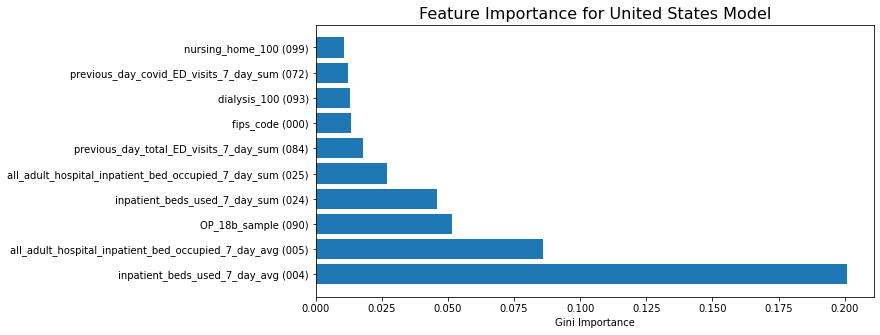

In [80]:
def format_names(names):
    return ["%s (%03d)"%(name, idx)for idx, name in enumerate(names)]
height, names= list(zip(*list(reversed(sorted(zip(
    loaded_model_US.feature_importances_,
    format_names(training_data_US.columns)
))))[:10]))
fig, axs = plt.subplots()
axs.barh(names, height)


axs.set_xlabel("Gini Importance")

fig.set_size_inches(10, 5)
axs.set_title("Feature Importance for United States Model", fontsize=16)

Text(0.5, 0.98, 'Feature Importance for Scottish models')

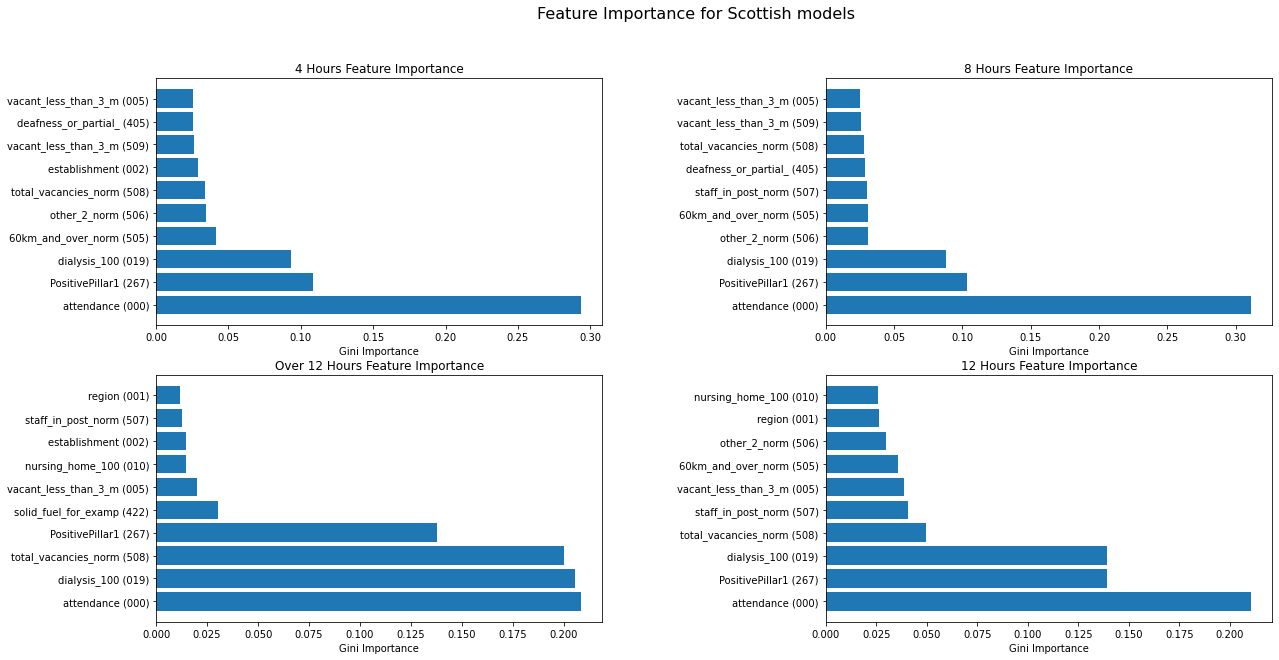

In [69]:
def format_names(names, length=20):
    return ["%s (%03d)"%(name[:length], idx)for idx, name in enumerate(names)]
fig, axs = plt.subplots(2, 2)


height, names= list(zip(*list(reversed(sorted(zip(
    model_4_hours_loaded_SCT.feature_importances_,
    format_names(training_data_SCT.columns)
))))[:10]))
axs[0,0].barh(names, height)
axs[0,0].set_title("4 Hours Feature Importance")

height, names= list(zip(*list(reversed(sorted(zip(
    model_8_hours_loaded_SCT.feature_importances_,
    format_names(training_data_SCT.columns)
))))[:10]))
axs[0,1].barh(names, height)
axs[0,1].set_title("8 Hours Feature Importance")


height, names= list(zip(*list(reversed(sorted(zip(
    model_12_hours_loaded_SCT.feature_importances_,
    format_names(training_data_SCT.columns)
))))[:10]))
axs[1,1].barh(names, height)
axs[1,1].set_title("12 Hours Feature Importance")


height, names= list(zip(*list(reversed(sorted(zip(
    model_long_hours_loaded_SCT.feature_importances_,
    format_names(training_data_SCT.columns)
))))[:10]))
axs[1,0].barh(names, height)
axs[1,0].set_title("Over 12 Hours Feature Importance")


for ar in axs:
    for a in ar:
        a.set_xlabel("Gini Importance")
plt.subplots_adjust(
    wspace=.5
)
fig.set_size_inches(20, 10)
fig.suptitle("Feature Importance for Scottish models", fontsize=16)

array([2.55902208e-01, 1.96093139e-02, 2.16471678e-02, 1.07205237e-02,
       1.74138686e-02, 2.72638682e-02, 1.96921919e-02, 6.79761307e-06,
       6.89806682e-04, 8.99478431e-05, 1.89034877e-02, 2.70670567e-04,
       3.67712910e-04, 9.19660638e-05, 7.09591479e-05, 5.92577992e-05,
       3.83807589e-03, 4.76288733e-04, 3.43049404e-05, 1.31502425e-01,
       2.89155393e-05, 2.68218476e-05, 2.54226085e-05, 4.16510639e-05,
       1.48606608e-05, 1.80452199e-04, 4.72381705e-05, 2.54354907e-05,
       6.67544834e-05, 3.23115942e-05, 6.00197264e-05, 3.70270369e-05,
       1.30368948e-04, 5.53676876e-05, 4.09433121e-05, 4.09803813e-05,
       2.27912282e-05, 4.01919379e-05, 1.01673224e-04, 2.63705191e-05,
       3.95607211e-05, 8.61493472e-05, 4.13627219e-05, 4.56736155e-05,
       3.20111626e-05, 1.32848078e-05, 6.22371120e-05, 1.82514043e-05,
       2.50737990e-05, 3.58238067e-05, 3.80567657e-05, 5.09547745e-05,
       5.51247923e-05, 1.67913841e-05, 2.15230686e-04, 6.15740215e-05,
      

Text(0.5, 1.0, 'Feature Importance for Average Scottish Model')

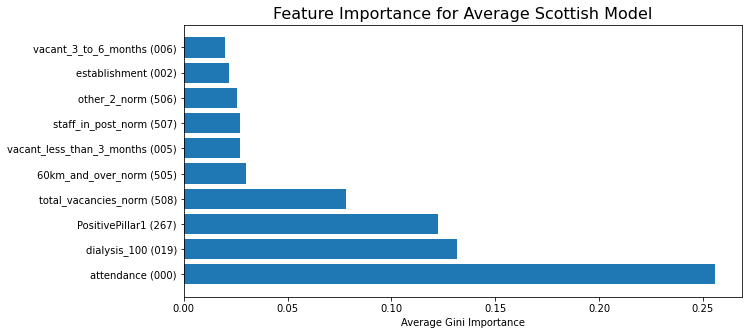

In [87]:
def format_names(names):
    return ["%s (%03d)"%(name, idx)for idx, name in enumerate(names)]
height, names= list(zip(*list(reversed(sorted(zip(
    (model_4_hours_loaded_SCT.feature_importances_ +
     model_8_hours_loaded_SCT.feature_importances_ +
     model_12_hours_loaded_SCT.feature_importances_ +
     model_long_hours_loaded_SCT.feature_importances_)/4,
    format_names(training_data_SCT.columns)
))))[:10]))
fig, axs = plt.subplots()
axs.barh(names, height)


axs.set_xlabel("Average Gini Importance")

fig.set_size_inches(10, 5)
axs.set_title("Feature Importance for Average Scottish Model", fontsize=16)